In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
sns.set_theme(style="darkgrid")
import h5py
import pickle
try:
    from pycaret.regression import *
except:
    !pip install pycaret
    from pycaret.regression import *
import warnings
warnings.filterwarnings("ignore")

In [123]:
df = pd.read_csv('Data/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [124]:
print(df.isnull().sum()/len(df)*100)

male               0.000000
age                0.000000
education          2.477584
currentSmoker      0.000000
cigsPerDay         0.684285
BPMeds             1.250590
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179802
sysBP              0.000000
diaBP              0.000000
BMI                0.448325
heartRate          0.023596
glucose            9.155262
TenYearCHD         0.000000
dtype: float64


In [125]:
df = df.fillna(0)
print(df.isnull().sum()/len(df)*100)

male               0.0
age                0.0
education          0.0
currentSmoker      0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64


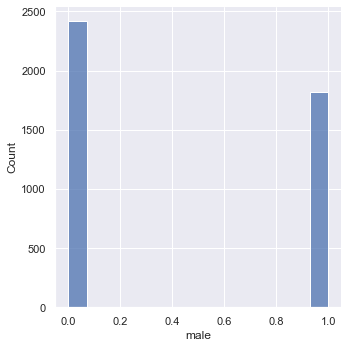

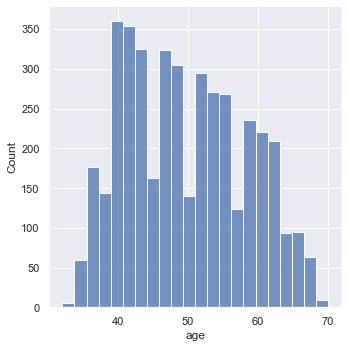

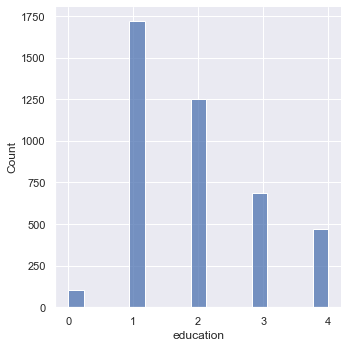

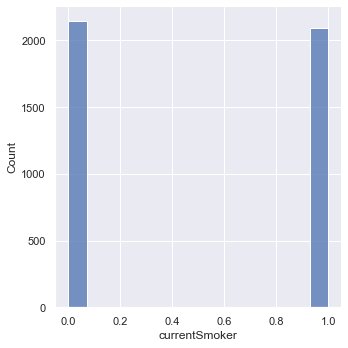

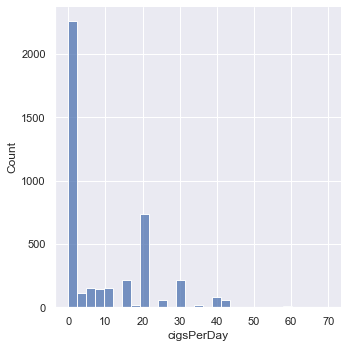

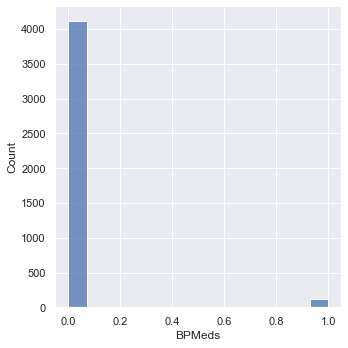

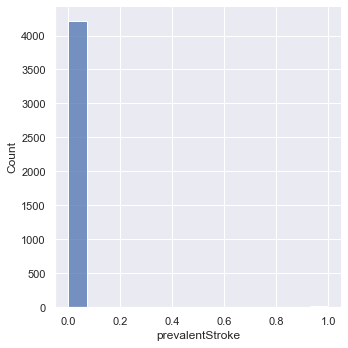

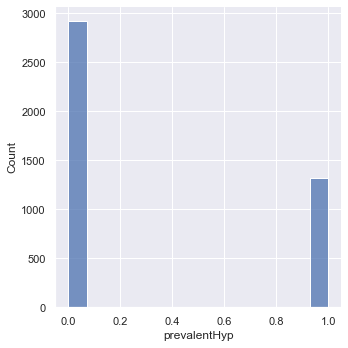

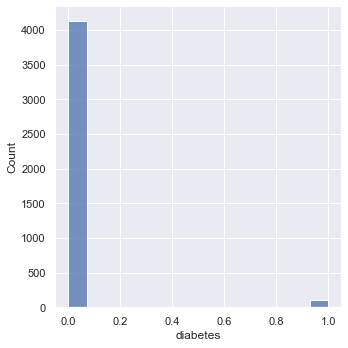

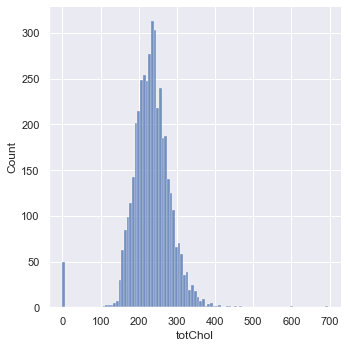

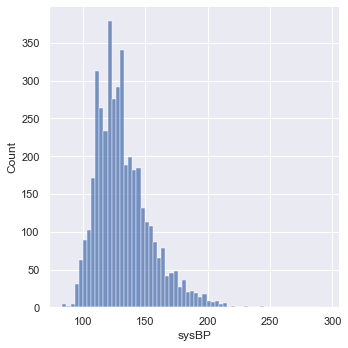

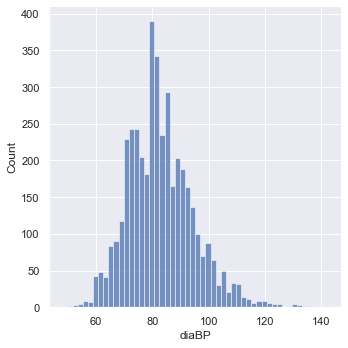

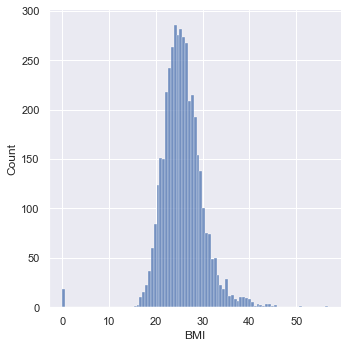

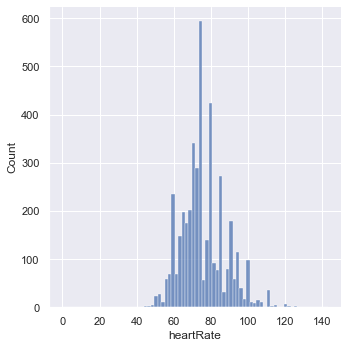

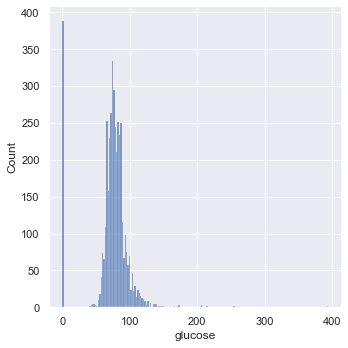

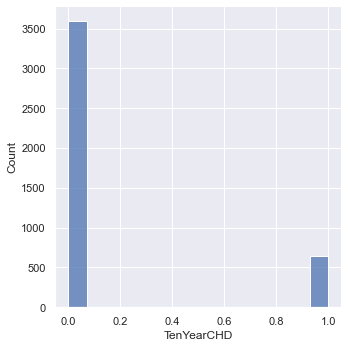

In [126]:
for cols in df.columns:
    sns.displot(df, x=cols)

In [180]:
columns = ['male', 'age', 'currentSmoker', 'cigsPerDay', 'BMI', 'heartRate', 'totChol']
df = pd.DataFrame(df, columns=columns)
df.head()

,male,age,currentSmoker,cigsPerDay,BMI,heartRate,totChol
0,1,39,0,0.0,26.97,80.0,195.0
1,0,46,0,0.0,28.73,95.0,250.0
2,1,48,1,20.0,25.34,75.0,245.0
3,0,61,1,30.0,28.58,65.0,225.0
4,0,46,1,23.0,23.10,85.0,285.0


In [181]:
exp = setup(data = df, target = 'totChol')
model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,34.5404,2498.4728,49.8641,0.0582,0.6173,0.1369,0.0790
lasso,Lasso Regression,34.9394,2532.7845,50.2027,0.0460,0.6175,0.1390,0.0140
en,Elastic Net,34.9404,2532.8730,50.2036,0.0459,0.6175,0.1390,0.0100
br,Bayesian Ridge,34.9505,2533.2630,50.2077,0.0458,0.6175,0.1391,0.0130
lr,Linear Regression,34.9742,2535.1927,50.2263,0.0451,0.6176,0.1392,0.5590
ridge,Ridge Regression,34.9740,2535.1853,50.2263,0.0451,0.6176,0.1392,0.0110
lar,Least Angle Regression,34.9742,2535.1926,50.2263,0.0451,0.6176,0.1392,0.0150
huber,Huber Regressor,34.8939,2541.3560,50.2875,0.0427,0.6181,0.1384,0.0300
omp,Orthogonal Matching Pursuit,35.1993,2550.7531,50.3838,0.0390,0.6176,0.1403,0.0100
xgboost,Extreme Gradient Boosting,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0170


In [182]:
y = df['totChol'].values
X = df.drop(columns=['totChol']).values
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_test, X_dev, y_test, y_dev = train_test_split(X_test, y_test)

In [183]:
def get_model(inp, hidden_layers=2, actvn='relu'):
  model = Sequential()
  model.add(Dense(50, input_dim=inp, kernel_initializer='normal', activation=actvn))
  for _ in range(hidden_layers):
      model.add(Dense(30, activation=actvn))
  model.add(Dense(1, activation=actvn))
  model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
  print(model.summary())
  return model

In [196]:
epochs = 15
batch_size = 200
callback = EarlyStopping(monitor='mean_absolute_error', mode='auto', verbose=2)

model = get_model(X_train.shape[1], hidden_layers=5)
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_dev, y_dev), callbacks=[callback])
predictions = model.predict(X_test)

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_601 (Dense)            (None, 50)                350       
_________________________________________________________________
dense_602 (Dense)            (None, 30)                1530      
_________________________________________________________________
dense_603 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_604 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_605 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_606 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_607 (Dense)            (None, 1)               

<AxesSubplot:>

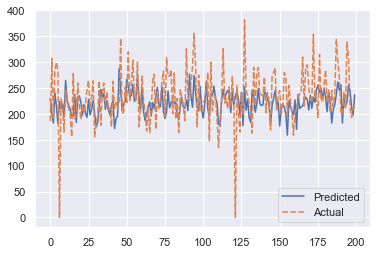

In [199]:
data = pd.DataFrame.from_dict({'Predicted': [i[0] for i in predictions][:200], 'Actual': y_test[:200]})
sns.lineplot(data=data)

In [179]:
model.save('model_data/model.h5')
with open('model_data/model.json', "w") as json_file:
    json_file.write(model.to_json())
print("Saved")

Saved
